# Day 17: Set and Forget

https://adventofcode.com/2019/day/17

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from AOC2019 import Intcode, readIntcodeProg

In [5]:
prog = readIntcodeProg("input17.txt")

## Part 1

In [6]:
a = Intcode(prog,"ASCII")
icol = 0
irow = 0
matrix = []
row = []
while(not a.isHalted):
    a.runProgram(0)
    o = a.getLastOutput()
    if (o!=10): # 10 starts a new line
        print(chr(o),end="")
        # 35 means #, 46 means .
        if (o==35):
            row.append(1)
        elif (o==46):
            row.append(0)
        else:
            row.append(2)
    else:
        print("")
        if (len(row)):
            matrix.append(row)
        row = []

....#########......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....#.......#......................................
....###########....................................
............#.#....................................
............#.#....................................
............#.#....................................
............#######................................
..............#...#................................
..............#...#.....###########.........#######
..............#...#.....#.........#.........#.....#
..............#...#.....#.........#.........#.....#
..............#...#.....#.........#.........#.....#
..........###########...#.........#.........#.....#
..........#...#...#.#...#.........#.........#.....#
..........#...###########.........#.........#.....#
..........#.

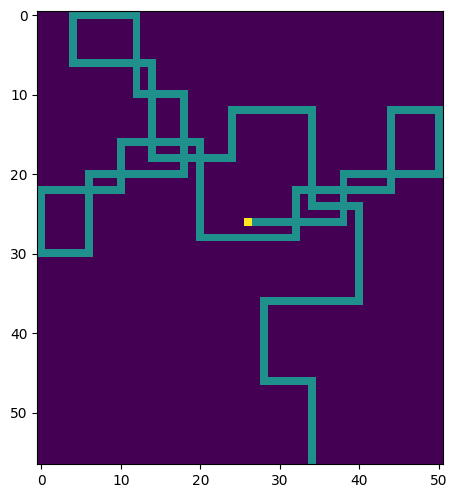

In [4]:
fig = plt.figure(figsize=(6, 6), dpi=100)
plt.imshow(matrix)

In [5]:
ncol = len(matrix)
nrow = len(matrix[0])
m = np.array(matrix)
ncross = 0
alignpar = 0
j0 = 0
i0 = 0
for j in range(1,ncol-1): # skip boards
    for i in range(1,nrow-1): # skip boards
        if m[j][i]==1: # scaffolding
            if m[j-1][i]==1 and \
               m[j+1][i]==1 and \
               m[j][i+1]==1 and \
               m[j][i-1]==1 : # crossing
                ncross += 1
                alignpar += i*j
        elif m[j][i]==2: # starting position
            j0 = j
            i0 = i
print("Sum of alignment parameters =",alignpar, "(", ncross, "crossings )")
print("Starting position: j = ",j0,", i =",i0)

Sum of alignment parameters = 5948 ( 13 crossings )
Starting position: j =  26 , i = 26


## Part 2

Let's start by finding the path, I'll code it in ASCII commands later

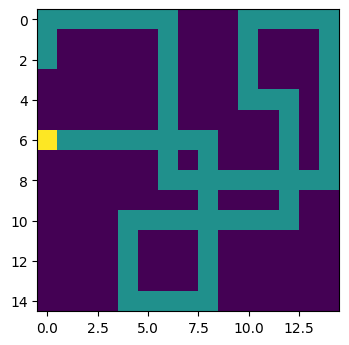

In [6]:
testarea = [[1,1,1,1,1,1,1,0,0,0,1,1,1,1,1],
 [1,0,0,0,0,0,1,0,0,0,1,0,0,0,1],
 [1,0,0,0,0,0,1,0,0,0,1,0,0,0,1],
 [0,0,0,0,0,0,1,0,0,0,1,0,0,0,1],
 [0,0,0,0,0,0,1,0,0,0,1,1,1,0,1],
 [0,0,0,0,0,0,1,0,0,0,0,0,1,0,1],
 [2,1,1,1,1,1,1,1,1,0,0,0,1,0,1],
 [0,0,0,0,0,0,1,0,1,0,0,0,1,0,1],
 [0,0,0,0,0,0,1,1,1,1,1,1,1,1,1],
 [0,0,0,0,0,0,0,0,1,0,0,0,1,0,0],
 [0,0,0,0,1,1,1,1,1,1,1,1,1,0,0],
 [0,0,0,0,1,0,0,0,1,0,0,0,0,0,0],
 [0,0,0,0,1,0,0,0,1,0,0,0,0,0,0],
 [0,0,0,0,1,0,0,0,1,0,0,0,0,0,0],
 [0,0,0,0,1,1,1,1,1,0,0,0,0,0,0]]


len(testarea)

fig = plt.figure(figsize=(4, 4), dpi=100)
plt.imshow(testarea)

In [50]:
N = np.array([-1,0]) # j, i
S = np.array([+1,0])
W = np.array([0,-1])
E = np.array([0,+1])

def turn(m,x0,d):
    '''Returns (N,S,W,E) direction depending on what L and R turn is needed, plus tunr label'''
    ymax = len(m)
    xmax = len(m[0])
    if   np.array_equal(d,N):
        L = W
        R = E
    elif np.array_equal(d,S):
        L = E
        R = W
    elif np.array_equal(d,W):
        L = S
        R = N
    elif np.array_equal(d,E):
        L = N
        R = S
    xL = x0 + L
    tL = 0
    if xL[0]>=0 and xL[1]>=0 and xL[0]<ymax and xL[1]<xmax:
        tL = m[xL[0]][xL[1]]
    xR = x0 + R
    tR = 0
    if xR[0]>=0 and xR[1]>=0 and xR[0]<ymax and xR[1]<xmax:
        tR = m[xR[0]][xR[1]]
    if tL>tR:
        return L, "L"
    elif tR>tL:
        return R, "R"
    
def commandSequence(m,x0,d,printSeq=False):
    '''Find sequence of L and R commands needed to run path'''
    ymax = len(m)
    xmax = len(m[0])
    segment = 0
    sequence = []   
    while( len(m[m==1]>0) ):
        m[x0[0]][x0[1]] = 3
        if len(m[m==1])==0:
            if(segment):
                if printSeq: print(t, segment)
                sequence.append(t+str(segment))
            break
        x1 = x0 + d    
        nexttile = 0
        if x1[0]>=0 and x1[1]>=0 and x1[0]<ymax and x1[1]<xmax:
            nexttile = m[x1[0]][x1[1]]
        if not nexttile:
            if(segment):
                if printSeq: print(t, segment)
                sequence.append(t+str(segment))
            T, t = turn(m,x0,d)
            d = T
            segment = 0
        else:
            segment += 1
            m[x0[0]][x0[1]] = 3
            x0 = x1
    return sequence

['R8', 'R8', 'R4', 'R4', 'R8', 'L6', 'L2', 'R4', 'R4', 'R8', 'R8', 'R8', 'L6', 'L2']


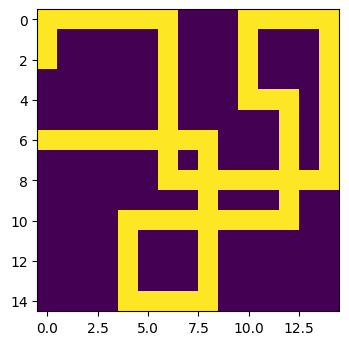

In [53]:
x0 = np.array([6,0]) # j,i
m = np.array(testarea)
d = N

## R,8,R,8,R,4,R,4,R,8,L,6,L,2,R,4,R,4,R,8,R,8,R,8,L,6,L,2

sequence = commandSequence(m,x0,d)
fig = plt.figure(figsize=(4, 4), dpi=100)
plt.imshow(m)
print(sequence)

['R12', 'L6', 'R12', 'L8', 'L6', 'L10', 'R12', 'L6', 'R12', 'R12', 'L10', 'L6', 'R10', 'L8', 'L6', 'L10', 'R12', 'L10', 'L6', 'R10', 'L8', 'L6', 'L10', 'R12', 'L10', 'L6', 'R10', 'R12', 'L6', 'R12', 'R12', 'L10', 'L6', 'R10']
34


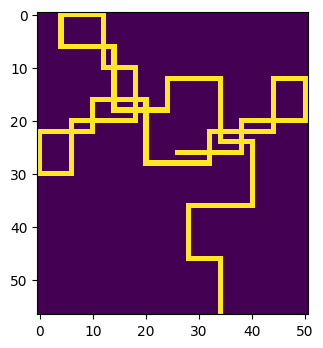

In [93]:
x0 = np.array([26, 26])
mm = np.array(matrix)
d = N # robots points N ^
fig = plt.figure(figsize=(4, 4), dpi=100)
sequence = commandSequence(mm,x0,d)
plt.imshow(mm)
print(sequence)
print(len(sequence))

In [94]:
# Solving by hand :-) while I'd need a compression algorithm...

seq = \
['R12', 'L6' , 'R12',         # A
 'L8' , 'L6' , 'L10',         # B
 'R12', 'L6' , 'R12',         # A
 'R12', 'L10', 'L6' , 'R10',  # C
 'L8' , 'L6' , 'L10',         # B
 'R12', 'L10', 'L6' , 'R10',  # C
 'L8' , 'L6' , 'L10',         # B
 'R12', 'L10', 'L6' , 'R10',  # C
 'R12', 'L6' , 'R12',         # A
 'R12', 'L10', 'L6' , 'R10']  # C

# MAIN = "ABACBCBCAC"
# A = ['R12', 'L6', 'R12']
# B = ['L8', 'L6', 'L10' ]
# C = ['R12', 'L10', 'L6', 'R10']

MAIN = 'A,B,A,C,B,C,B,C,A,C'
A = 'R,12,L,6,R,12'
B = 'L,8,L,6,L,10'
C = 'R,12,L,10,L,6,R,10'

# continuous video feed; provide either y or n and a newline.
FEED_ = [ord('n'),10]

# the ASCII definitions of the main routine and the movement functions may each contain 
# at most 20 characters, not counting the newline
print(len(MAIN_),len(A_),len(B_),len(C_))

20 14 13 19


In [95]:
def stringToASCII(s):
    seq = []
    for c in s:
        seq.append(ord(c))
    seq.append(10) # endline
    return seq

MAIN_ = stringToASCII(MAIN)
A_ = stringToASCII(A)
B_ = stringToASCII(B)
C_ = stringToASCII(C)
print(MAIN_,A_,B_,C_,FEED_)

[65, 44, 66, 44, 65, 44, 67, 44, 66, 44, 67, 44, 66, 44, 67, 44, 65, 44, 67, 10] [82, 44, 49, 50, 44, 76, 44, 54, 44, 82, 44, 49, 50, 10] [76, 44, 56, 44, 76, 44, 54, 44, 76, 44, 49, 48, 10] [82, 44, 49, 50, 44, 76, 44, 49, 48, 44, 76, 44, 54, 44, 82, 44, 49, 48, 10] [110, 10]


In [96]:
prog2 = list(prog)
prog2[0] = 2

a = Intcode(prog2,"ASCII")

for inp in MAIN_: a.runProgram(inp)
for inp in A_:    a.runProgram(inp)
for inp in B_:    a.runProgram(inp)
for inp in C_:    a.runProgram(inp)
for inp in FEED_: a.runProgram(inp)

a.getLastOutput()

46